In [22]:
import os
from Bio import Entrez, SeqIO
from Bio.SeqUtils import GC
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

## Set up Email for NCBI, Accessoion No.

In [7]:
# Set email for NCBI access
# Get email from environment variable
Entrez.email = os.getenv("NCBI_EMAIL", "@.")

# Accession number of target gene, HBB
accession = "NM_000518.5"

## Fetch sequence information

In [8]:
# Fetch FASTA Seq from NCBI
handle = Entrez.efetch(db = "nucleotide", id = accession, rettype="fasta", retmode="text")
seq_record = SeqIO.read(handle, "fasta")
handle.close()

In [9]:
# Print sequence information
print(f"Gene ID: \t\t{seq_record.id}")
print(f"Sequence length: \t{len(seq_record.seq)} bp")
print(f"First 100 bases: \t{seq_record.seq[:100]}...")

Gene ID: 		NM_000518.5
Sequence length: 	628 bp
First 100 bases: 	ACATTTGCTTCTGACACAACTGTGTTCACTAGCAACCTCAAACAGACACCATGGTGCATCTGACTCCTGAGGAGAAGTCTGCCGTTACTGCCCTGTGGGG...


## Entrez response

In [14]:
print("response dir: ", dir(seq_record))
print("ID:", seq_record.id)                
print("Name:", seq_record.name)            
print("Description:", seq_record.description) 
print("Sequence Length:", len(seq_record.seq)) 
print("Annotations:", seq_record.annotations)  
print("DB Cross-references:", seq_record.dbxrefs)  
print("Features:", seq_record.features)  

response:  ['__add__', '__bool__', '__class__', '__contains__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__le___', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__radd__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_per_letter_annotations', '_seq', '_set_per_letter_annotations', '_set_seq', 'annotations', 'dbxrefs', 'description', 'features', 'format', 'id', 'letter_annotations', 'lower', 'name', 'reverse_complement', 'seq', 'translate', 'upper']
ID: NM_000518.5
Name: NM_000518.5
Description: NM_000518.5 Homo sapiens hemoglobin subunit beta (HBB), mRNA
Sequence Length: 628
Annotations: {}
DB Cross-references: []
Features: []


## Save sequence as a FASTA file

In [10]:
file_name = "hbb_gene.fasta"
with open(file_name, "w") as fasta_file:
    SeqIO.write(seq_record, fasta_file, "fasta")

print(f"FASTA file saved: {file_name}")

FASTA file saved: hbb_gene.fasta


## GC Content

In [12]:
gc_content = GC(seq_record.seq)
print(f"GC Content: {gc_content: .2f}%")

GC Content:  51.27%


## Base frequency

In [19]:
base_counts = Counter(seq_record.seq)

print("Nucleotide frequency")
for base, count in base_counts.items():
    print(f"{base}: {count}")

Nucleotide frequency
A: 139
C: 157
T: 167
G: 165


## Save frequency as CSV file

In [21]:
data_frame = pd.DataFrame(base_counts.items(), columns=["Base","Count"])
file_name = "base_counts.csv"
data_frame.to_csv(file_name, index=False) # Possible formats: CSV, TSV, XLSX, JSON, Parquet, HDFS and etc...
print(f"CSV file saved: {file_name}")

CSV file saved: base_counts.csv


## Visualize Base Frequencies

Graph saved: nucleotide_frequency.png


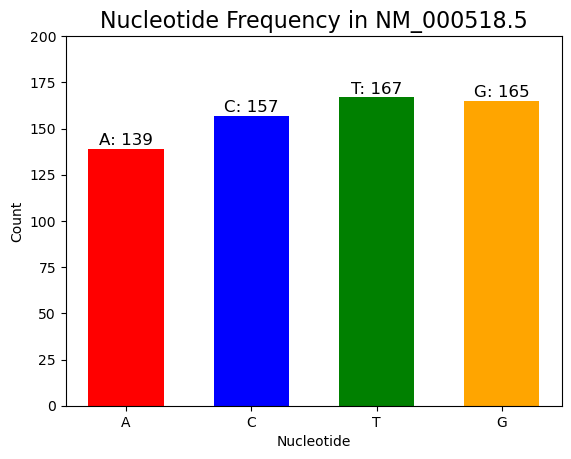

In [33]:
labels = list(base_counts.keys())
values = list(base_counts.values())

plt.bar(labels, values, color = ["red", "blue", "green", "orange"], width = 0.6)

for i,v in enumerate(values):
    plt.text(
        x= i,
        y= v+2,
        s= f"{labels[i]}: {v}",
        ha='center',
        fontsize=12
    )

plt.xlabel("Nucleotide")
plt.ylabel("Count")
plt.title(f"Nucleotide Frequency in {seq_record.id}", fontsize=16)
plt.ylim(0,200)

#Save graph as an image file
image_file_name = "nucleotide_frequency.png"
plt.savefig(image_file_name)
print(f"Graph saved: {image_file_name}")

plt.show()